# 1.단순 회귀 예측 모델

> *이 노트는 [머신러닝과 딥러닝을 활용한 비트코인 가격예측 데이터분석](../upbitAnalyzer_data_analysis_report.ipynb)의 *모델 선택* 과정에서 생성되었습니다.*

- **데이터소스:** BTC/KRW(비트코인 대 한국 원화) - 2022년 9월 17일부터 가장 최근의 일간 조정 종가(Adjusted Close)
- **입력 변수:** 단순 회귀 분석 모델에서는 예측에 사용되는 하나의 독립 변수를 선택합니다. 이 변수는 BTC/KRW 가격에 영향을 미치는 요인으로 선택되며, 주로 경제적인 지표나 기술적 분석 지표로 구성될 수 있습니다.
- **종속 변수:** BTC/KRW 가격으로 설정되며, 이를 예측하는 것이 목표입니다.
- **모델 구조:** 단순 회귀 분석 모델은 선형 회귀 모델로 구성됩니다. 주어진 입력 변수와 BTC/KRW 가격 간의 선형 관계를 모델링하고, 이를 기반으로 예측을 수행합니다.
- **학습 및 예측:** 모델은 학습 데이터를 기반으로 회귀 계수를 추정하고, 이를 사용하여 새로운 데이터에서 BTC/KRW 가격을 예측합니다. 학습은 일반적으로 최소 제곱법 등의 회귀 분석 기법을 사용하여 수행됩니다.
- **모델 평가:** 학습된 모델의 성능은 주로 평균 제곱 오차(Mean Squared Error)나 결정 계수(Coefficient of Determination) 등의 지표를 사용하여 평가됩니다. 이를 통해 모델의 예측 정확도를 평가하고 비교할 수 있습니다.

단순 회귀 분석모델은 비트코인 일간 조정 종가를 분석하여...

## 1.1 데이터 수집
BTC/KRW(비트코인 대 한국 원화) - 2022년 9월 17일부터 가장 최근의 조정 종가(Adjusted Close)

In [1]:
from pandas_datareader import data as pdr
import yfinance as yfin
from datetime import date, datetime

today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = datetime(2013,1,1)

# BTC(KRW)
yfin.pdr_override()

btc_krwname = 'Bitcoin(KRW)'
btc_krw = 'BTC-KRW'
btc_krw_df = pdr.get_data_yahoo(btc_krw, start=date_start, end=date_today)

print(btc_krw_df.shape)
btc_krw_df.head()

[*********************100%***********************]  1 of 1 completed
(3172, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,482611.81250,483811.03125,468121.03125,473203.50000,473203.50000,21787470960
2014-09-18,472713.03125,476276.53125,430991.40625,442818.25000,442818.25000,35976322560
2014-09-19,442466.65625,447515.40625,401278.37500,411989.34375,411989.34375,39571102935
2014-09-20,411861.00000,441730.53125,406862.40625,426711.75000,426711.75000,38469009780
2014-09-21,425857.09375,430387.15625,410304.03125,416189.65625,416189.65625,27737663355


## 1.2 전처리
본 모델의 전처리는 단순히, 지수 이동 평균 전처리를 사용합니다. 지수 이동 평균(Exponential Moving Average, EMA)은 시계열 데이터를 평활화하는데 유용한 전처리 방법 중 하나입니다. 이를 통해 데이터의 잡음을 줄이고 추세를 부드럽게 만들 수 있습니다.

지수 이동 평균은 과거 데이터에 가중치를 부여하여 평균을 계산하는 방식입니다. 최근 데이터일수록 더 높은 가중치를 가지며, 가중치는 지수 함수를 통해 결정됩니다. 일반적으로 지수 이동 평균을 계산하기 위해 사용되는 기간(창)은 사용자가 설정할 수 있으며, 기간이 길수록 평활화 정도가 높아집니다.

본 모델을 위한 전처리 과정으로 지수 이동 평균을 7일 기간으로 계산하였습니다.

In [52]:
from sklearn.preprocessing import MinMaxScaler

# 이동평균 전처리: MinMaxScaler를 사용하여 데이터 정규화
scaler = MinMaxScaler()
moving_average = btc_krw_df['Adj Close'].rolling(window=7).mean().values.reshape(-1, 1)
btc_krw_df['MA'] = scaler.fit_transform(moving_average)

C:\Users\creat\AppData\Local\Temp\ipykernel_26744\4094699527.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_krw_df['MA'] = scaler.fit_transform(moving_average)


## 1.3 데이터 분리
본 예측 모델은  Linear Regression 모델을 사용하므로 훈련이 필요하지 않은 모델입니다. Linear Regression 모델은 훈련단계에서 데이터에 대한 선형관계를 학습하는 것이 아니라, 훈련 데이터에 대한 특성(X)과 타겟(Y) 간의 선형 관계를 계산하는 과정을 거칩니다. 즉, 학습과정에서 최적화를 수행하는 것이 아니라, 모델이 예측을 수행할 준비를 하는 것입니다.

단순 회귀 예측 모델에서 훈련 데이터를 사용하여 모델을 학습하고, 테스트 데이터를 사용하여 모델의 성능을 평가하는 것은 분리된 테스트 데이터는 모델이 이전에 접하지 못한 새로운 데이터로 간주하는 방법으로 적용할 수 있습니다. 이를 통해, 테스트 데이터에 대한 성능 평가를 통해 모델이 새로운 데이터에 대해 얼마나 일반화되는지를 확인할 수 있습니다.

In [80]:
from sklearn.model_selection import train_test_split

# 특성(X)과 타겟(y) 데이터 생성
X = btc_krw_df[['MA']].values[7:]  # 일부 데이터 삭제하여 길이를 맞춤
y = btc_krw_df['Adj Close'].values[7:]

# 데이터를 학습 데이터와 테스트 데이터로 분할
split_index = int(len(X) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

## 1.4 모델 생성 및 검증

In [114]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set upper and lower bounds for predicted values
upper_bound = btc_krw_df['Adj Close'].max() * 1.2  # Example: 20% above the maximum value
lower_bound = btc_krw_df['Adj Close'].min() * 0.8  # Example: 20% below the minimum value

# Linear regression model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the training data (scaled values)
y_train_pred_scaled = model.predict(X_train)

# Predictions on the test data (scaled values)
y_test_pred_scaled = model.predict(X_test)

# Inverse transform the scaled predictions
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))

# Apply upper and lower bounds to the predictions
y_train_pred = np.clip(y_train_pred, lower_bound, upper_bound)
y_test_pred = np.clip(y_test_pred, lower_bound, upper_bound)


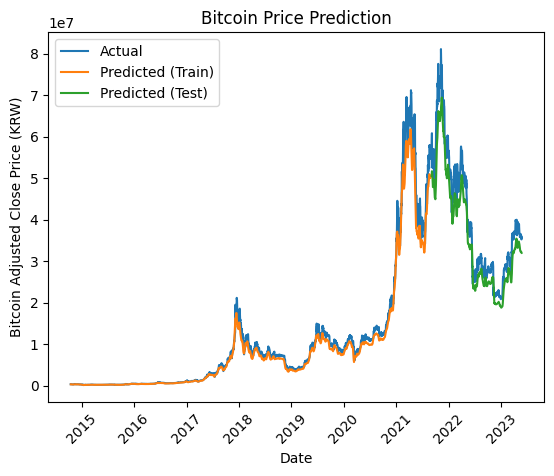

Train MSE: 4815358846983.529
Test MSE: 22751787861800.14


In [115]:
import matplotlib.pyplot as plt

# 학습 데이터와 테스트 데이터의 실제 가격 시각화
plt.plot(btc_krw_df['Adj Close'], label='Actual')
plt.plot(btc_krw_df.index[1:split_index+1], y_train_pred, label='Predicted (Train)')
plt.plot(btc_krw_df.index[split_index+7:], y_test_pred, label='Predicted (Test)')
plt.xlabel('Date')
plt.ylabel('Bitcoin Adjusted Close Price (KRW)')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 평균 제곱 오차 계산
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

주어진 Linear Regression 모델의 결과를 보면, 훈련 데이터에 대한 RMSE(Root Mean Squared Error) 값은 약 1,131,498.93이고, 테스트 데이터에 대한 RMSE 값은 약 2,127,112.08입니다.

RMSE는 예측 값과 실제 값 간의 차이를 나타내는 지표로, 낮을수록 모델의 예측이 실제 값에 가까워진다는 것을 의미합니다. 따라서, 훈련 데이터에 대한 RMSE 값이 테스트 데이터에 대한 RMSE 값보다 낮다는 것은 모델이 훈련 데이터에 대해서는 상대적으로 좋은 예측 성능을 보이지만, 새로운 데이터인 테스트 데이터에 대해서는 예측 성능이 낮아진다는 것을 의미할 수 있습니다.

### 실제 예측 작업 수행

In [119]:
import numpy as np

# Future predictions
future_dates = pd.date_range(start='2023-05-25', end='2023-05-31')
X_predict = X[-1:]

predicted_prices = []
for _ in range(7):
    predicted_price_scaled = model.predict(X_predict)
    predicted_price = scaler.inverse_transform(predicted_price_scaled.reshape(-1, 1))
    predicted_price = np.clip(predicted_price, lower_bound, upper_bound)
    predicted_prices.append(predicted_price)
    X_predict = np.roll(X_predict, -1)
    X_predict[-1] = predicted_price_scaled

predicted_prices = np.array(predicted_prices)
predicted_prices

array([[[32051336.86043794]],

       [[97366089.6       ]],

       [[97366089.6       ]],

       [[97366089.6       ]],

       [[97366089.6       ]],

       [[97366089.6       ]],

       [[97366089.6       ]]])

ValueError: x and y can be no greater than 2D, but have shapes (7,) and (7, 1, 1)

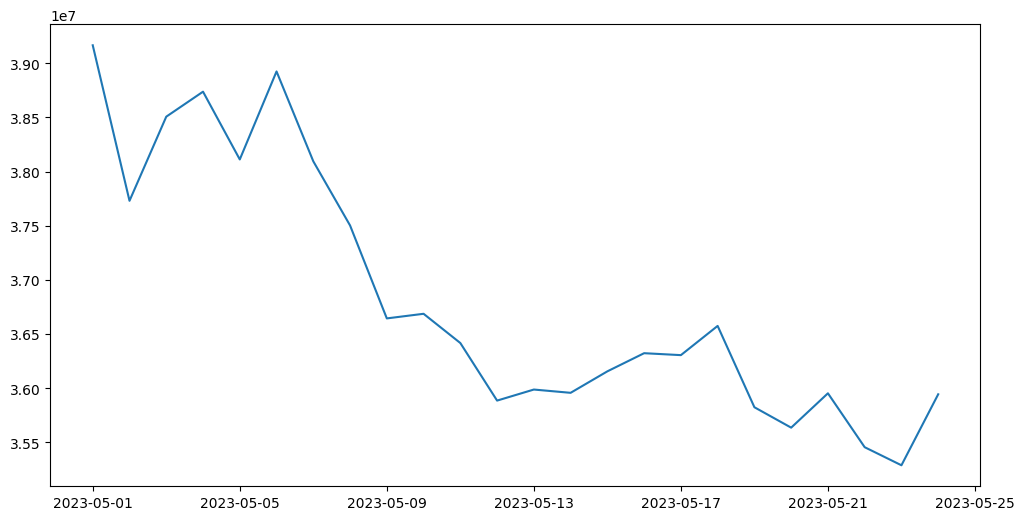

In [120]:
import matplotlib.pyplot as plt

# 원본 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(btc_krw_df.loc['2023-05':].index, btc_krw_df.loc['2023-05':, 'Adj Close'], label='Original Data')

# 예측 데이터 시각화
plt.plot(future_dates, predicted_prices, label='Predicted Prices')

# 첫 번째 값과 마지막 값을 표시
plt.annotate(f'First: {float(predicted_prices[0]):.2e}', (future_dates[0], float(predicted_prices[0])), xytext=(10, -30),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', lw=1.5))
plt.annotate(f'Last: {float(predicted_prices[-1]):.2e}', (future_dates[-1], float(predicted_prices[-1])), xytext=(10, -30),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', lw=1.5))

plt.title('Bitcoin Price Prediction', fontsize=16)
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
btc_krw_df.loc['2023-05':, 'Adj Close']

Date
2023-05-01    39166628.0
2023-05-02    37730208.0
2023-05-03    38507192.0
2023-05-04    38738068.0
2023-05-05    38112156.0
2023-05-06    38924988.0
2023-05-07    38094992.0
2023-05-08    37502532.0
2023-05-09    36643956.0
2023-05-10    36686600.0
2023-05-11    36416524.0
2023-05-12    35884832.0
2023-05-13    35986932.0
2023-05-14    35956644.0
2023-05-15    36155000.0
2023-05-16    36322640.0
2023-05-17    36304736.0
2023-05-18    36574660.0
2023-05-19    35823416.0
2023-05-20    35634940.0
2023-05-21    35952264.0
2023-05-22    35454384.0
2023-05-23    35287412.0
2023-05-24    35943132.0
Name: Adj Close, dtype: float64

예측 결과, First(5월 25일)은 36,039,404.18원